In [1]:
#!pip install pyemgpipeline
#!pip install plotly
#!pip install ipympl
#!pip install neurokit2

In [1]:
import pandas as pd
import pyemgpipeline as pep
import neurokit2 as nk
import os
import numpy as np
from scipy import signal
from matplotlib.figure import SubplotParams
%matplotlib widget

import matplotlib.pyplot as plt # визуализация

plt.rcParams.update({'font.size': 14})

In [83]:
# заполняем данные файлов (путь папки, название файлов, название трайла, каналов и частота дискретизации)
data_folder = ''
data_filenames = ['', '']
trial_names = ['','']
channel_names = ['Flexor carpi radialis', 'Extensor digitorum']
sample_rate = 1259

In [84]:
# задаем функцию загрузки файла в среду
def load_file(filename):
    with open(filename) as fp:
        collect_values = np.array([])
        lines = fp.readlines()
        for line in lines[1:]:  # first few lines are data description
            items = [float(e) for e in line.split(',')[1:4:2] if e != '']
            collect_values = np.concatenate((collect_values, np.array(items)))
    _data = collect_values.reshape(-1, 2)
    return _data

In [85]:
# загружаем файлы в массив
all_data = []
for i in range(len(data_filenames)):
    filepath = os.path.join(data_folder, data_filenames[i])
    data = load_file(filepath)
    all_data.append(data)

In [86]:
# проверяем размер полученного массива
all_data

[array([[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]]),
 array([[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]])]

In [87]:
for k in range(len(all_data)):
    print(f'data shape of {k:6}: {all_data[k].shape}')

data shape of      0: (22015, 2)
data shape of      1: (12580, 2)


In [88]:
emg_plot_params = pep.plots.EMGPlotParams(
    n_rows=2,
    n_cols=1,
    )

In [89]:
EMG = pep.wrappers.EMGMeasurementCollection(all_data, hz=sample_rate, trial_names=trial_names,
                                          channel_names=channel_names, emg_plot_params=emg_plot_params)

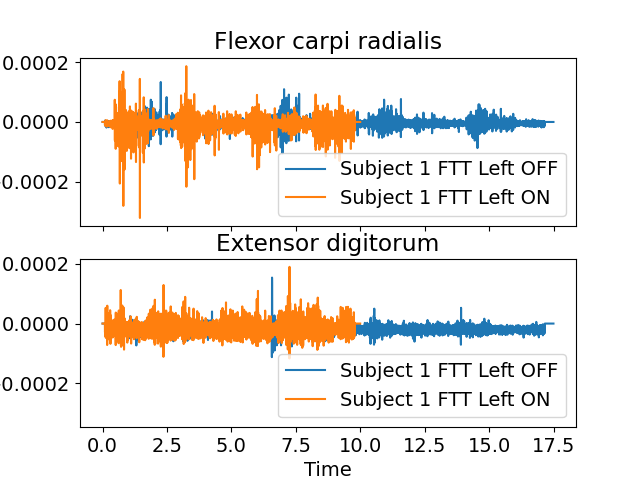

In [90]:
EMG.plot(is_overlapping_trials=True)

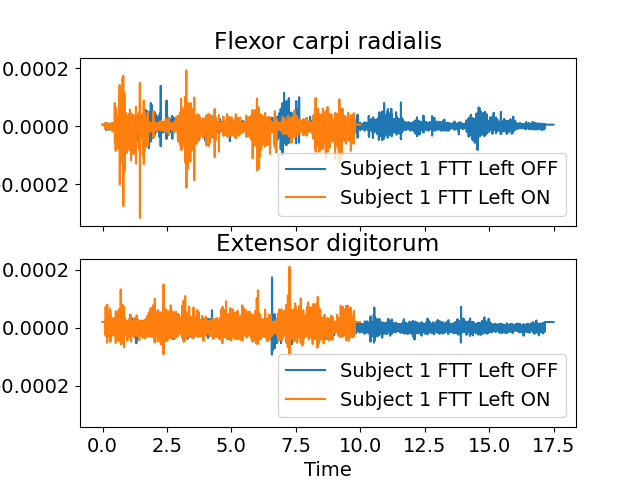

In [91]:
EMG.apply_dc_offset_remover()
EMG.plot(is_overlapping_trials=True)

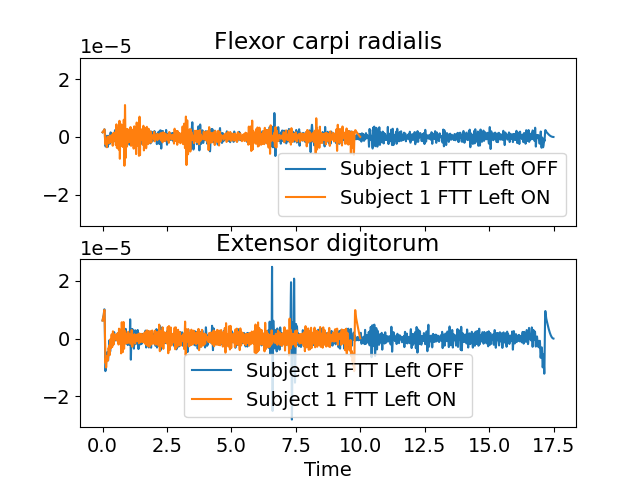

In [92]:
EMG.apply_bandpass_filter(bf_order=4, bf_cutoff_fq_lo=1, bf_cutoff_fq_hi=20)
EMG.plot(is_overlapping_trials=True)

In [ ]:
all_beg_ts = [2, 2]
all_end_ts = [21, 21]
EMG.apply_segmenter(all_beg_ts, all_end_ts)
EMG.plot(is_overlapping_trials=True)

In [93]:
data_folder_last = ''
new_filepath = []
for i in range(len(data_filenames)):
    upload_path = os.path.join(data_folder_last, data_filenames[i])
    new_filepath.append(upload_path)
EMG.export_csv(new_filepath)